# 3. Data Visualization


## 3.1 Visualization of Attribute Distributions

#### Visualize attribute distributions. Choose and visualize distributions for a subset of single attributes. Choose any appropriate visualization such as histograms, kernel density estimation, box plots, etc. Describe anything meaningful or potentially interesting you discover from these visualizations. Note: You can also use data from other sources to bolster visualizations. Visualize at least 5 attributes, at least one categorical and at least one numeric. 

In [17]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv('insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df['age_range'] = pd.cut(df.age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])
df['bmi_range'] = pd.cut(df.bmi, [0, 18.5, 25, 30, 80], labels=['underweight', 'healthweight', 'overweight', 'obese'])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,teenager,overweight
1,18,male,33.770,1,no,southeast,1725.55230,teenager,obese
2,28,male,33.000,3,no,southeast,4449.46200,young_adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthweight
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


### 3.1.1 Visualization of BMI

Text(0.5, 1.0, 'Distribution of bmi')

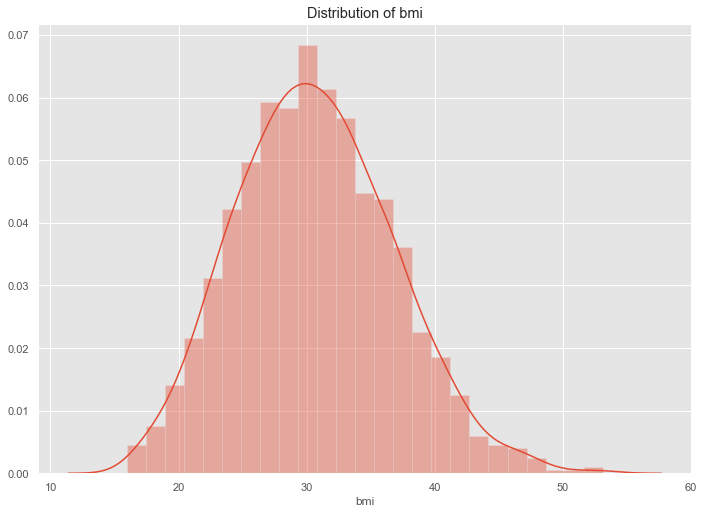

In [19]:
# Describe the distribution of bmi
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.bmi)
plt.title('Distribution of bmi')

From the distribution of bmi, we can conclude that most people's bmi is around 30, which is healthweight.

Text(0.5, 1.0, 'bmi and region')

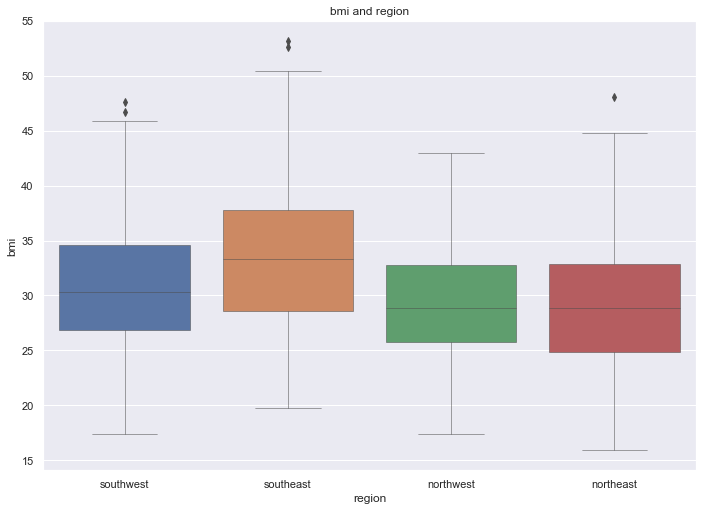

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to describe the distribution of bmi according to region
sns.boxplot(x='region', y='bmi', data=df, linewidth=0.5)
plt.title('bmi and region')

We draw a boxplot to show that there is a link between bmi and region. From the boxplot, we can see in southeastern area, people's bmi is higher than other regions. 
This is interesting, so we did some digging about 'Obesity in the United States'.
We found out that in the top 10 states of obesity ranking in America, 8 states are southeastern states including Mississippi, Alabama, Louisiana, South Carolina, Tennessee, Kentucky, Arkansas and West Virginia. (Reference: https://en.wikipedia.org/wiki/Obesity_in_the_United_States)

Text(0.5, 1.0, 'bmi and age range')

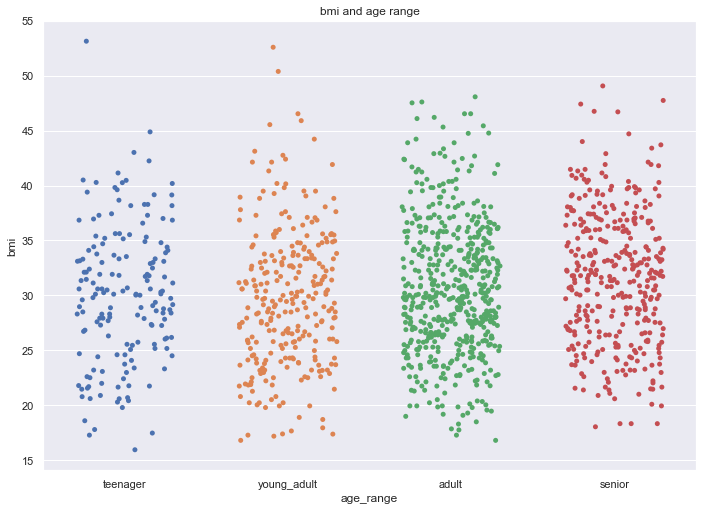

In [21]:
# draw a stripplot to describe the distribution of bmi according to age range
sns.stripplot(x='age_range',y='bmi',data=df,jitter=0.3).set_title('bmi and age range')

From the stripplot above, We found out that age can also influence bmi. With people get older, their bmi get higher too.
It's understandable because in a medical article, it points out that when people get older, slightly higher BMI may help protect old people from thinning of the bones (osteoporosis). (Reference: https://medlineplus.gov/ency/article/007196.htm)

### 3.1.2 Visualization of Charges(Medical Bill Paid By Insurance Companies)

Text(0.5, 1.0, 'Distribution of charges')

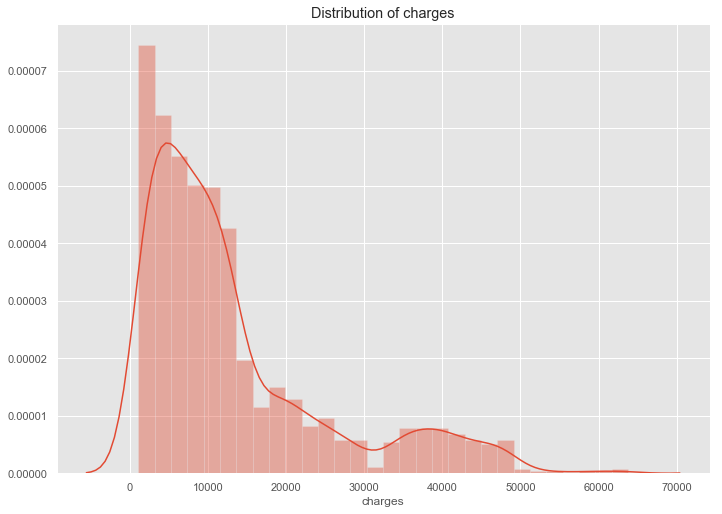

In [42]:
# draw distribution of charges(Individual medical costs billed by health insurance)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.charges)
plt.title('Distribution of charges')

From the distribuation of charges, we can see most people's charges(medical bill) paid by insurance companies is under $20,000.

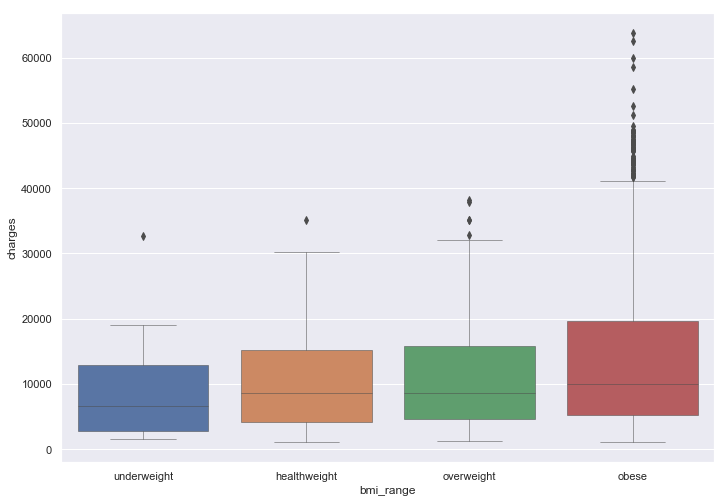

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show charges are influenced by bmi range
sns.boxplot(x='bmi_range', y='charges', data=df, linewidth=0.5)

From the boxplot above, we can see the amount of charges(medical bills paid by insurance companies) are influenced by bmi. The higher your bmi is, the higher your charges(medical bills paid by insurance companies) are. So the insurance companies should pay more attention on people with high bmi, it could help insurance companies set standard for charging insurance fee. And people need to stay healthy if they want to spend less on insurance charges, people who have higher bmi should exercise a lot.

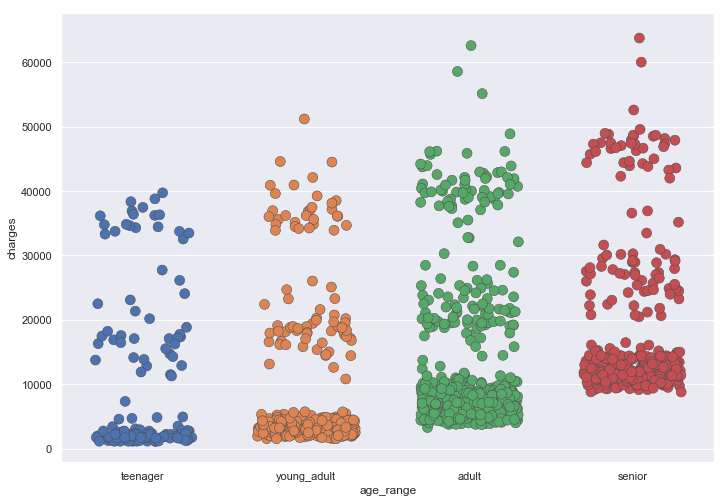

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show how charges are influenced by age range
sns.stripplot(x='age_range', y='charges', data=df, linewidth=0.5, size=10, jitter=0.3)

We drew a stripplot to see if age influence charges(medcial bills) too. The older you get, the more likely you need to pay more on your medical bills.

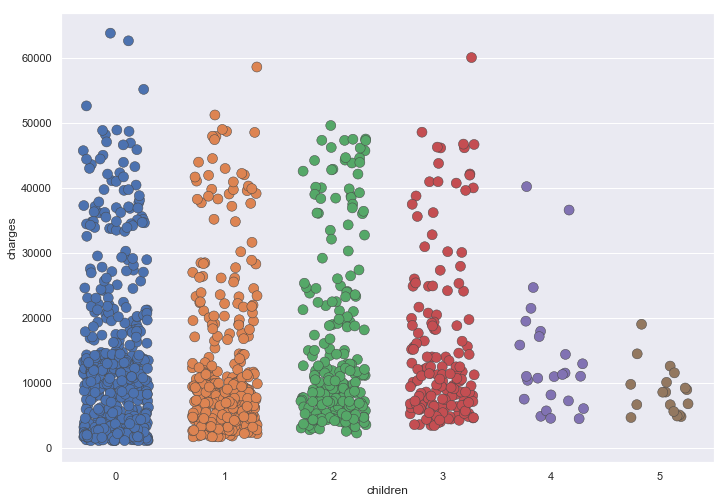

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show how charges are influenced by age range(Number of children covered by health insurance / Number of dependents)
sns.stripplot(x='children', y='charges', data=df, linewidth=0.5, size=10, jitter=0.3)

From the stripplot above between charges and children(Number of children covered by health insurance / Number of dependents), we found out an interesting phenomenon. We were thinking that charges(medical bills paid by insurance companies) should be higher with more children. But in fact, we notice that the more children that are covered by insurance, the lower medical bills paid by insurance companies.

### 3.1.3 Visualization of Age

Text(0.5, 1.0, 'Distribution of age')

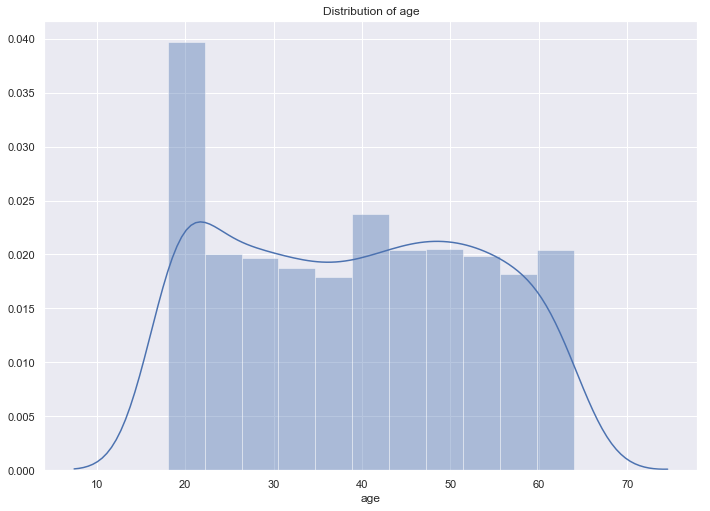

In [48]:
# Describe the distribution of age
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.age)
plt.title('Distribution of age')

From the distribution of age, we know age from 20 to 30 is the largest group of people in this dataset. But generally speaking, the distribution of age is uniform.

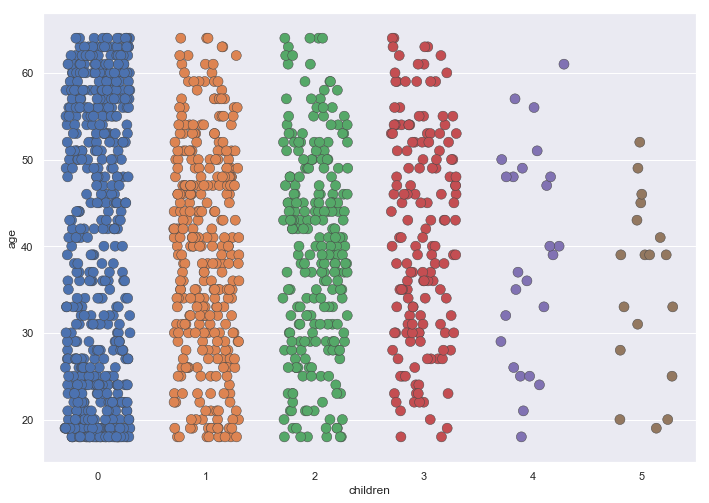

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.stripplot(x='children', y='age', data=df, linewidth=0.5, size=10, jitter=0.3)

From age-children stripplot, we can see that most people's children attribute is under 4 and people with children attribute that is more than 3 are usually under 50. We assume that attribute children(Number of children covered by health insurance / Number of dependents) is proportional to the number of children the dependents have. From there, we can assume the larger attribute children is, the more number of children the dependents have. It's reasonable that nowadays, people don't want to have too many kids or don't want to have kid at all in some countries. And even if people want to have more children, they have to have enough resource and energy including enough financial resource and good health condition. We think that can explain why people with children attribute is 5 tend to be younger.

### 3.1.4 Visualization of Children(Number of children covered by health insurance / Number of dependents) Distribution

Text(0.5, 1.0, 'Distribution of children')

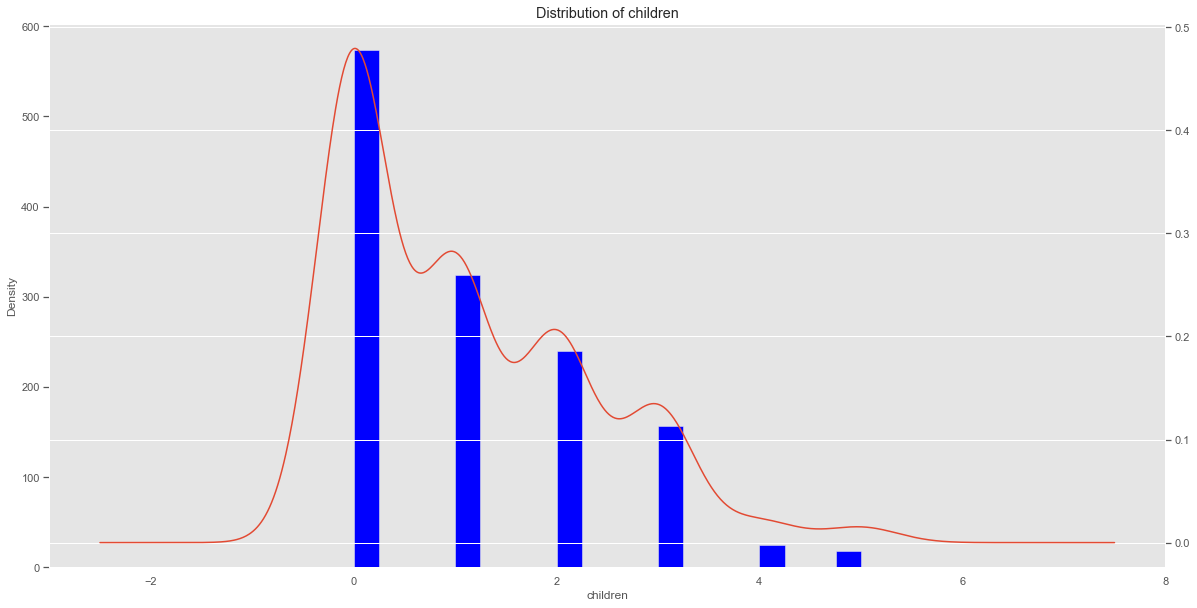

In [52]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))

# Describe the children frequency distribution
hist = df.children.plot.hist(bins=20, color='blue')
# Describe the children frequency using kde.
kde = df.children.plot.kde(secondary_y=True, bw_method=0.3)
hist.set_xlabel('children')
plt.title('Distribution of children')

From the distribution of number of children, we know there is a large part of people that have no child or no children that are covered by insurance in this dataset and only a small part of people with children attribute that is more than 3.

### 3.1.5 Visualization of Smoking, Children and Age

In [34]:
# Replace somker with 1 and non-smoker with 0.
df_change_smoker = df.replace(to_replace={'yes':1,'no':0})

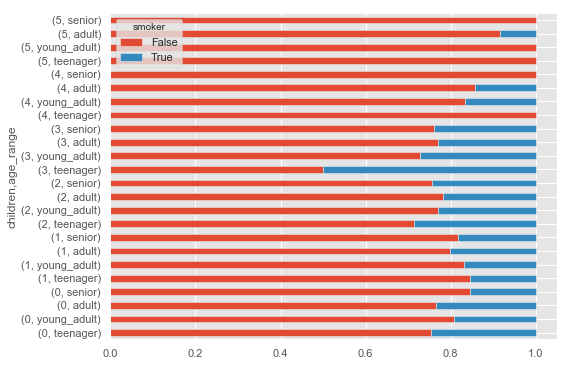

In [55]:
# group by age range and children
df_group1 = df_change_smoker.groupby(by=['age_range','children'])
# draw a crosstab divided by smoker
smoke = pd.crosstab([df_change_smoker['children'], df_change_smoker['age_range']], df_change_smoker.smoker.astype(bool))
smoke_rate = smoke.div(smoke.sum(1).astype(float),axis=0)
smoke_rate.plot(kind='barh', stacked=True, figsize=(8,6))
plt.show()

In [58]:
#group by children
df_group_by_children = df_change_smoker.groupby(by='children')
df_group_by_age_range = df_change_smoker.groupby(by='age_range')

#Now let's calculate the smoking rate of each group
print('The smoking Rate for group of different number of children:')
print(df_group_by_children.smoker.sum() / df_group_by_children.smoker.count())
print('The smoking Rate for group of different age range:')
print(df_group_by_age_range.smoker.sum() / df_group_by_age_range.smoker.count())

The smoking Rate for group of different number of children:
children
0    0.200348
1    0.188272
2    0.229167
3    0.248408
4    0.120000
5    0.055556
Name: smoker, dtype: float64
The smoking Rate for group of different age range:
age_range
teenager       0.234940
young_adult    0.201439
adult          0.213755
senior         0.179775
Name: smoker, dtype: float64


Before we talk about this drawing, we assume attribute "children"(Number of children covered by health insurance / Number of dependents) is proportional to the number of children the dependents have. So we can assume people with higher "children" attribute would have more children.
First, we group people according to their age range and the attribute "children" and we drew a crosstab to see which group of people is more likely to be smokers. 
Then we also group people according to attribute "children" and calculate smoking rate of each group. We also group people according to age range and calculate smoking rate of each group.
From above, we can see teenager have highest smoking rate and senior have lowest smoking rate.
We can also see when people's children attribute is more than 3(let's assume people who have more than 3 children), smoking rate will drop, maybe it's because people are busy with looking after their children, they don't have time to do that. But people whose children attribute is 3(let's say people who have 3 children) have the highest smoking rate, we try to find out why, from an article(Reference: https://mom.me/baby/7607-three-kids-right-number/), we know that it's easier having less than 3 children or more than 4 children compared to having 3 children. Having children is painful and stressful, maybe that's why people with 3 children are more likely to smoke. Here's what article say: “Four is easier because the kids can pair off. Especially when you have two of each. With three there is one left out. Also when it was three the baby got treated more like a baby for some reason. With four you can't indulge the youngest and she's more likely to try and keep up with the others.”(Reference: https://mom.me/baby/7607-three-kids-right-number/)

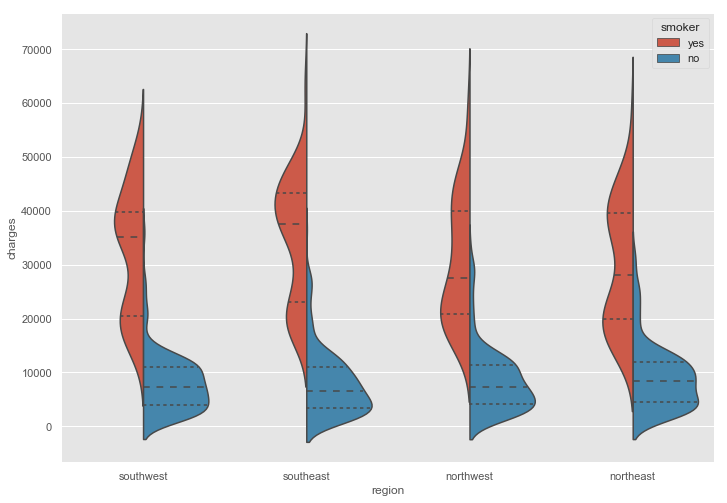

In [62]:
# draw a violoin plot to show region, charges and how smoking influence charges(medical bills paid by insurance companies)
sns.violinplot(x="region", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

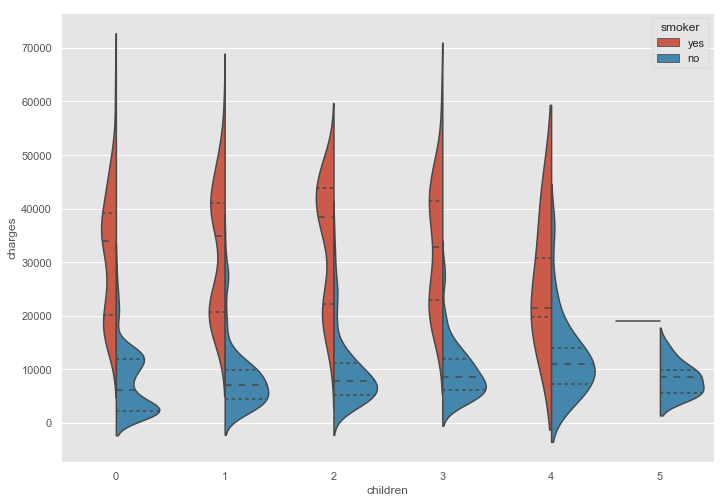

In [63]:
# draw a violoin plot to show children, charges and how smoking influence charges(medical bills paid by insurance companies)
sns.violinplot(x="children", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

We drew two violin plots between charges, region and smoker and between charges, region and smoker. According to the first violin above, people in different regions have similar spread and shape of charges(medical bill paid by insurance companies). However in the same region, the distributions of people who smoke is approximately uniform, but the distributions of people who don't smoke is not.
Along with the second violin plot, we can clearly conclude that, no matter where people come from or how many children they have that are covered by insurance, people who don't smoke will have less charges(medical bill paid by insurance companies) than people who smoke. So the insurance companies should pay more attentions on smoker because they may cause higher medical bills. These plots could help insurance companies set standard for charging insurace fee. And people who smoke should also pay more attentions if they want to spend less on their medical bills or insurance fees.